# Case Study - Stroke

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data
df= pd.read_csv("C:/Users/TEEM/Desktop/stroke_data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
#Display column
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
#Count value stroke
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

## Check unique data

In [8]:
#check unique data
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [9]:
#remove id column
df = df.drop('id', axis=1)

In [10]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Check duplicate value

In [11]:
#Check duplicate data

df.duplicated().sum()

0

## Check missing value

In [12]:
#check missing value
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
#fill missing values
#BMI is an important feature
#find mean 
bmi_mean = round(df['bmi'].mean(), 1)
bmi_mean

28.9

In [14]:
#fill the missing data
df['bmi'].fillna(bmi_mean, inplace=True)

In [15]:
#check missing data again
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Data Preprocessing

In [16]:
#remove other gender
#If very few people have a gender value of "Other" then it might be better to drop them
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [17]:
df.drop(df[df['gender'] == 'Other'].index, axis=0, inplace=True)

In [18]:
df.shape

(5109, 11)

In [19]:
#Convert catogorical variable to numerical variable
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

lb, le, lo = LabelBinarizer(), LabelEncoder(), OrdinalEncoder()

col = ['ever_married','Residence_type','gender','work_type', 'smoking_status']
for i in col:
    df[i] = le.fit_transform(df[i])   

In [20]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.9,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [21]:
columnX = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']

In [22]:
columnY = ['No stroke (1)', 'Stroke (0)']

## Modelling

In [23]:
X = df.drop('stroke',axis=1).values
y = df['stroke'].values

In [24]:
X

array([[  1.  ,  67.  ,   0.  , ..., 228.69,  36.6 ,   1.  ],
       [  0.  ,  61.  ,   0.  , ..., 202.21,  28.9 ,   2.  ],
       [  1.  ,  80.  ,   0.  , ..., 105.92,  32.5 ,   2.  ],
       ...,
       [  0.  ,  35.  ,   0.  , ...,  82.99,  30.6 ,   2.  ],
       [  1.  ,  51.  ,   0.  , ..., 166.29,  25.6 ,   1.  ],
       [  0.  ,  44.  ,   0.  , ...,  85.28,  26.2 ,   0.  ]])

In [25]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [27]:
# Standardizing our training and testing data.
# perform feature scaling after splitting the data into training and testing sets in order to avoid data leakage.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# Adding upsampling data
from collections import Counter
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print(f"Before Upsampling: {counter}")

upsample = SMOTE()
X_train, y_train = upsample.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)

Before Upsampling: Counter({0: 3900, 1: 187})
Counter({0: 3900, 1: 3900})


In [29]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_rus, y_rus = rus.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus , random_state =43, test_size = 0.2)

In [30]:
#Color DT tree
#Class node
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
    
    def is_leaf(self):
        return self.value is not None

#Class DecisionTreeNew
class DecisionTreeNew:
    def __init__(self, max_depth=100, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def _is_finished(self, depth):
        if (depth >= self.max_depth
            or self.n_class_labels == 1
            or self.n_samples < self.min_samples_split):
            return True
        return False
    
    def _entropy(self, y):
        proportions = np.bincount(y) / len(y)
        entropy = -np.sum([p * np.log2(p) for p in proportions if p > 0])
        return entropy

    def _create_split(self, X, thresh):
        left_idx = np.argwhere(X <= thresh).flatten()
        right_idx = np.argwhere(X > thresh).flatten()
        return left_idx, right_idx

    def _information_gain(self, X, y, thresh):
        parent_loss = self._entropy(y)
        left_idx, right_idx = self._create_split(X, thresh)
        n, n_left, n_right = len(y), len(left_idx), len(right_idx)

        if n_left == 0 or n_right == 0: 
            return 0
        
        child_loss = (n_left / n) * self._entropy(y[left_idx]) + (n_right / n) * self._entropy(y[right_idx])
        return parent_loss - child_loss

    def _best_split(self, X, y, features):
        split = {'score':- 1, 'feat': None, 'thresh': None}

        for feat in features:
            X_feat = X[:, feat]
            thresholds = np.unique(X_feat)
            for thresh in thresholds:
                score = self._information_gain(X_feat, y, thresh)

                if score > split['score']:
                    split['score'] = score
                    split['feat'] = feat
                    split['thresh'] = thresh

        return split['feat'], split['thresh']
    
    def _build_tree(self, X, y, depth=0):
        self.n_samples, self.n_features = X.shape
        self.n_class_labels = len(np.unique(y))

        # stopping criteria
        if self._is_finished(depth):
            most_common_Label = np.argmax(np.bincount(y))
            return Node(value=most_common_Label)

        # get best split
        rnd_feats = np.random.choice(self.n_features, self.n_features, replace=False)
        best_feat, best_thresh = self._best_split(X, y, rnd_feats)

        # grow children recursively
        left_idx, right_idx = self._create_split(X[:, best_feat], best_thresh)
        left_child = self._build_tree(X[left_idx, :], y[left_idx], depth + 1)
        right_child = self._build_tree(X[right_idx, :], y[right_idx], depth + 1)
        return Node(best_feat, best_thresh, left_child, right_child)
    
    def _traverse_tree(self, x, node):
        if node.is_leaf():
            return node.value
        
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def fit(self, X, y):
        self.root = self._build_tree(X, y)

    def predict(self, X):
        predictions = [self._traverse_tree(x, self.root) for x in X]
        return np.array(predictions)

    
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


#Train color decision tree
DT = DecisionTreeNew(max_depth=10)
DT.fit(X_train,y_train) 
DT_predictions = DT.predict(X_test)

## Measurement

In [31]:
#Color DT tree
test_score = accuracy(y_test, DT_predictions)

print(f'Test Score: {test_score}')

Test Score: 0.71


In [34]:
from sklearn.metrics import classification_report, f1_score, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay

print(classification_report(y_test, DT_predictions))
print()
print('weighted F1 score: ', f1_score(y_test, DT_predictions, average = 'weighted'))
print('F1 score: ', f1_score(y_test, DT_predictions))

fp_rate, tp_rate, thresholds = roc_curve(y_test, DT_predictions)
print('auc score: ', auc(fp_rate, tp_rate)) 
print('roc_auc score: ', roc_auc_score(y_test, DT_predictions, average = 'weighted'))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71        46
           1       0.77      0.67      0.71        54

    accuracy                           0.71       100
   macro avg       0.71      0.71      0.71       100
weighted avg       0.72      0.71      0.71       100


weighted F1 score:  0.7102030203020301
F1 score:  0.7128712871287127
auc score:  0.7137681159420289
roc_auc score:  0.7137681159420289


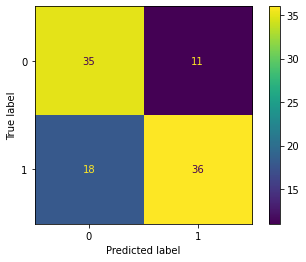

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, DT_predictions)